In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
data=pd.read_csv("/content/filaments_cmes.csv")

In [ ]:
data_needed=data[['dur_min','X','Y','RATING','TYPE_corrected','ERUPTION_corrected','TWIST_crctd','WRITHE_crctd','THREADS_crctd','CAVITY_corrected','CME_crctd']]

,dur_min,X,Y,RATING,TYPE_corrected,ERUPTION_corrected,TWIST_crctd,WRITHE_crctd,THREADS_crctd,CAVITY_corrected,CME_crctd
0,86,287.0,111.0,0.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0,554.0,179.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1239,-455.0,240.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,160,-95.0,-410.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,782,501.0,-421.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,116,221.0,-354.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,118,199.0,-378.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,99,347.0,-393.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,375,180.0,659.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,154,804.0,712.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
##one hot encoding to features
from sklearn.preprocessing import OneHotEncoder
OHE=OneHotEncoder(handle_unknown='ignore')

In [ ]:
##dropping Nan
data_processed=data_needed.dropna()

In [ ]:
data_neeeded1=pd.get_dummies(data_processed,columns=['TYPE_corrected','ERUPTION_corrected','TWIST_crctd','WRITHE_crctd','THREADS_crctd','CAVITY_corrected'])

In [ ]:
data_neeeded1.shape

(820, 24)

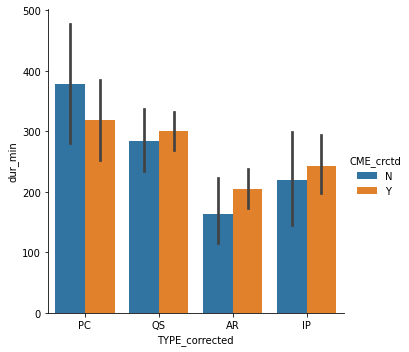

In [ ]:
##statistics of each feature
#3duration with eruption
import seaborn as sns
sns.catplot(x="TYPE_corrected", y="dur_min",hue='CME_crctd', kind="bar", data=data_processed)

In [ ]:
data_processed.columns

Index(['dur_min', 'X', 'Y', 'RATING', 'TYPE_corrected', 'ERUPTION_corrected',
       'TWIST_crctd', 'WRITHE_crctd', 'THREADS_crctd', 'CAVITY_corrected',
       'CME_crctd'],
      dtype='object')

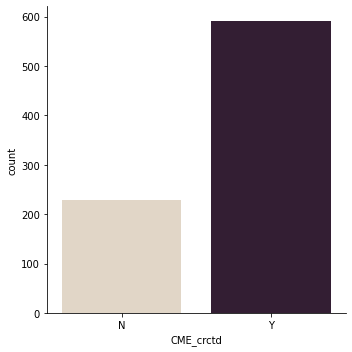

In [ ]:
sns.catplot(x="CME_crctd", kind="count", palette="ch:.25", data=data_processed)

In [ ]:
##testlabel encoding
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()
data_neeeded1['CME_crctd'] = LE.fit_transform(data_neeeded1['CME_crctd'])



In [ ]:
#splitting into train and test
xdata=data_neeeded1[['dur_min','X','Y','RATING','TYPE_corrected_AR',	'TYPE_corrected_IP',	'TYPE_corrected_PC',	'TYPE_corrected_QS',	'ERUPTION_corrected_C',	'ERUPTION_corrected_F',	'ERUPTION_corrected_N',	'ERUPTION_corrected_P',	'TWIST_crctd_A',	'TWIST_crctd_N',	'TWIST_crctd_Y',	'WRITHE_crctd_N',	'WRITHE_crctd_Y',	'THREADS_crctd_N',	'THREADS_crctd_Y',	'CAVITY_corrected_D',	'CAVITY_corrected_N',	'CAVITY_corrected_Y']]
ydata=data_neeeded1[['CME_crctd']]

In [ ]:
xdata=data_neeeded1[['dur_min']]
ydata=data_neeeded1[['CME_crctd']]

In [ ]:
#after feature selection
xdata=data_neeeded1[['ERUPTION_corrected_C','ERUPTION_corrected_F', 'ERUPTION_corrected_N', 'ERUPTION_corrected_P','RATING','dur_min','TYPE_corrected_AR', 'TYPE_corrected_IP',
       'TYPE_corrected_PC', 'TYPE_corrected_QS','THREADS_crctd_N', 'THREADS_crctd_Y']]
ydata=data_neeeded1[['CME_crctd']]  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


<BarContainer object of 12 artists>

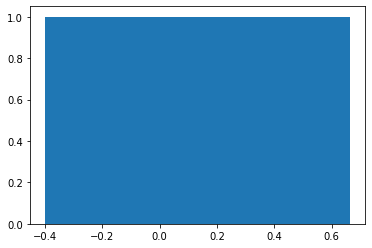

In [ ]:
##featureranking
from pandas import read_csv
from sklearn.ensemble import ExtraTreesClassifier
# load data

model = ExtraTreesClassifier(n_estimators=10)
model.fit(xdata, ydata)
plt.bar(model.feature_importances_,height=1)

In [ ]:
xdata.columns

Index(['ERUPTION_corrected_C', 'ERUPTION_corrected_F', 'ERUPTION_corrected_N',
       'ERUPTION_corrected_P', 'RATING', 'dur_min', 'TYPE_corrected_AR',
       'TYPE_corrected_IP', 'TYPE_corrected_PC', 'TYPE_corrected_QS',
       'THREADS_crctd_N', 'THREADS_crctd_Y'],
      dtype='object')

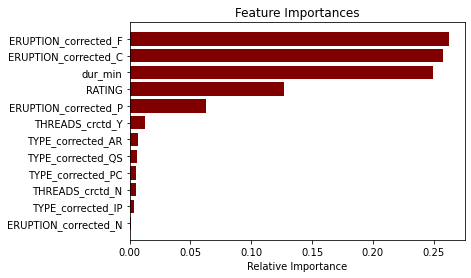

In [ ]:
importances = model.feature_importances_
indices = np.argsort(importances)
features=xdata.columns

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='maroon', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [ ]:
['dur_min', 'X', 'Y', 'RATING', 'TYPE_corrected_AR', 'TYPE_corrected_IP',
       'TYPE_corrected_PC', 'TYPE_corrected_QS', 'ERUPTION_corrected_C',
       'ERUPTION_corrected_F', 'ERUPTION_corrected_N', 'ERUPTION_corrected_P',
       'TWIST_crctd_A', 'TWIST_crctd_N', 'TWIST_crctd_Y', 'WRITHE_crctd_N',
       'WRITHE_crctd_Y', 'THREADS_crctd_N', 'THREADS_crctd_Y',
       'CAVITY_corrected_D', 'CAVITY_corrected_N', 'CAVITY_corrected_Y']

In [ ]:
##feature ranking

In [ ]:
from sklearn import svm
C = 4.0; gamma = 0.075;class_weight={1:1}
svm = svm.SVC(C=C, gamma=gamma, kernel='rbf',class_weight=class_weight, cache_size=500, max_iter=-1, shrinking=True, tol=1e-8)

In [ ]:
import numpy as np, matplotlib.pylab as plt, matplotlib.mlab as mlab, pandas as pd, requests, urllib, json
from datetime import datetime as dt_obj
from datetime import timedelta
#from sklearn import svm

from sklearn.model_selection import StratifiedKFold, KFold
#from sunpy.time import TimeRange
#import sunpy.instr.goes
from scipy.stats import pearsonr as pearse
%matplotlib inline

In [ ]:
#SVM
from sklearn import svm
C = 4.0; gamma = 0.075; class_weight = {1:6.5}
svm = svm.SVC(C=C, gamma=gamma,probability=True, kernel='rbf',class_weight=class_weight, cache_size=500, max_iter=-1, shrinking=True, tol=1e-8)
#XGBOOST
import xgboost as xgb
XGboost = xgb.XGBClassifier(objective="reg:logistic")
#RF
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(n_estimators=100,max_depth=2,class_weight='balanced')
#Decisiontree
from sklearn.tree import DecisionTreeClassifier
DT=DecisionTreeClassifier(class_weight='balanced')

#Logisticregression
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression(class_weight='None')

#ELNET

from sklearn.linear_model import ElasticNet
ELNET=ElasticNet()

#Naivebayes
from sklearn.naive_bayes import GaussianNB
Bayes = GaussianNB()

#Adaboost

from sklearn.ensemble import AdaBoostClassifier
Adaboost=AdaBoostClassifier(n_estimators=100)

#KNN
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=15)

#Balanced bagging
from imblearn.ensemble import BalancedBaggingClassifier 
Balancedbagging = BalancedBaggingClassifier(base_estimator=DecisionTreeClassifier(),n_estimators=50,sampling_strategy='auto',replacement=False)

#LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
LDA = LinearDiscriminantAnalysis(n_components=1)

#Gradient boosting
from sklearn.ensemble import GradientBoostingClassifier
GB = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1)


In [ ]:
method=[svm,XGboost,RF,DT,LR,Bayes,Adaboost,KNN,LDA,GB]

In [ ]:
def get_models():
	models = list()
	models.append(LogisticRegression())
	models.append(RidgeClassifier())
	models.append(SGDClassifier())
	models.append(PassiveAggressiveClassifier())
	models.append(KNeighborsClassifier())
	models.append(DecisionTreeClassifier())
	models.append(ExtraTreeClassifier())
	models.append(LinearSVC())
	models.append(SVC())
	models.append(GaussianNB())
	models.append(AdaBoostClassifier())
	models.append(BaggingClassifier())
	models.append(RandomForestClassifier())
	models.append(ExtraTreesClassifier())
	models.append(GaussianProcessClassifier())
	models.append(GradientBoostingClassifier())
	models.append(LinearDiscriminantAnalysis())
	models.append(QuadraticDiscriminantAnalysis())
	return models

In [ ]:
from sklearn.metrics import confusion_matrix
def confusion_table(pred, labels):
    """
    computes the number of TP, TN, FP, FN events given the arrays with predictions and true labels
    and returns the true skill score
  
    Args:
    pred: np array with predictions (1 for flare, 0 for nonflare)
    labels: np array with true labels (1 for flare, 0 for nonflare)
  
    Returns: true negative, false positive, true positive, false negative
    """  
    Nobs = len(pred)
    TN = 0.; TP = 0.; FP = 0.; FN = 0.
    for i in range(Nobs):
        if (pred[i] == 0 and labels[i] == 0):
            TN += 1
        elif (pred[i] == 1 and labels[i] == 0):
            FP += 1
        elif (pred[i] == 1 and labels[i] == 1):
            TP += 1 
        elif (pred[i] == 0 and labels[i] == 1):
            FN += 1
        else:
            print ("Error! Observation could not be classified.")
    return TN,FP,TP,FN
def plot_confusion_matrix(predicted_labels_list, y_test_list):
    cnf_matrix = confusion_matrix(y_test_list, predicted_labels_list)
    np.set_printoptions(precision=2)

    # Plot non-normalized confusion matrix
    plt.figure()
    generate_confusion_matrix(cnf_matrix, classes=class_names, title='Confusion matrix, without normalization')
    plt.show()

    # Plot normalized confusion matrix
    plt.figure()
    generate_confusion_matrix(cnf_matrix, classes=class_names, normalize=True, title='Normalized confusion matrix')
    plt.show()
def generate_confusion_matrix(cnf_matrix, classes, normalize=False, title='Confusion matrix'):
    if normalize:
        cnf_matrix = cnf_matrix.astype('float') / cnf_matrix.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cnf_matrix, interpolation='nearest', cmap=plt.get_cmap('Blues'))
    plt.title(title)
    plt.colorbar()

    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cnf_matrix.max() / 2.

    for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
        plt.text(j, i, format(cnf_matrix[i, j], fmt), horizontalalignment="center",
                 color="white" if cnf_matrix[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

    return cnf_matrix

import itertools
class_names=["without_CME","withCME"]


In [ ]:
##training and tessting metrics
from sklearn.model_selection import StratifiedKFold, KFold
def model_name(model,xdata,ydata):
  these_TSS_for_this_k = []
  lraccs=[]
  recs=[]
  precs=[]
  recs=[]
  TSS_k1_mean=[]
  TSS_k1_std=[]
  fscore=[]
  roc_auc=[]
  from sklearn.metrics import accuracy_score
  from sklearn.metrics import precision_score
  from sklearn.metrics import recall_score
  from sklearn.metrics import f1_score
  from sklearn.metrics import roc_curve
  from sklearn.metrics import roc_auc_score
  skf = StratifiedKFold(n_splits=10)
  for j,i in (skf.split(xdata,ydata)):
      train = xdata.iloc[j]; test = xdata.iloc[i]     # test is examples in testing set; train is examples in training set
      ytrain = ydata[j]; ytest = ydata[i]
      model.fit(train, ytrain)
      pred=model.predict(test)
      TN,FP,TP,FN = confusion_table(pred, ydata[i])
      if (((TP+FN) == 0.0) or (FP+TN)==0.0):
          these_TSS_for_this_k.append(-1.0)
          continue
      else:
          these_TSS_for_this_k.append(TP/(TP+FN) - FP/(FP+TN))
      print(TN,FP,TP,FN)
      lracc = accuracy_score(ytest, pred)
      prec = precision_score(ytest, pred)
      rec = recall_score(ytest, pred)
      lraccs.append(lracc)
      precs.append(prec)
      recs.append(rec)
      
      fscore.append(f1_score(ytest,pred))
      roc_auc.append(roc_auc_score(ytest,pred))
  TSS_k = np.array(these_TSS_for_this_k)

  array_of_avg_TSS=np.mean(TSS_k)
  array_of_std_TSS=np.std(TSS_k)
  TSS_k1_mean.append(array_of_avg_TSS)
  TSS_k1_std.append(array_of_std_TSS)
  print("model_name=",model)
  print("The TSS equals",round(array_of_avg_TSS,2),'+/-',round(array_of_std_TSS,2))
  lraccuracy = np.mean(lraccs)
  print("accscore:",round(np.mean(lraccs),2),'+/-',round(np.std(lraccs),2))
  print("Precision:",round(np.mean(precs),2),'+/-',round(np.std(precs),2))
  print("REcall:",round(np.mean(recs),2),'+/-',round(np.std(recs),2))
  print("F1score:",round(np.mean(fscore),2),'+/-',round(np.std(fscore),2))
  print("ROC_AUC:",round(np.mean(roc_auc),2),'+/-',round(np.std(roc_auc),2))
  #plot_confusion_matrix(pred, ytest)
  print("1-with CME,0-without CME")

In [ ]:
method=[svm,XGboost,RF,DT,LR,Bayes,Adaboost,KNN,LDA,GB]

In [ ]:
np.array(ydata).reshape(820,).shape

(820,)

In [ ]:
model_name(GB,xdata,np.array(ydata).reshape(820,))

21.0 2.0 58.0 1.0
11.0 12.0 59.0 0.0
9.0 14.0 57.0 2.0
17.0 6.0 57.0 2.0
17.0 6.0 58.0 1.0
15.0 8.0 57.0 2.0
18.0 5.0 56.0 3.0
19.0 4.0 57.0 2.0
19.0 4.0 58.0 1.0
19.0 3.0 60.0 0.0
model_name= GradientBoostingClassifier(learning_rate=1.0, max_depth=1)
The TSS equals 0.7 +/- 0.16
accscore: 0.9 +/- 0.05
Precision: 0.9 +/- 0.05
REcall: 0.98 +/- 0.02
F1score: 0.94 +/- 0.03
ROC_AUC: 0.85 +/- 0.08
1-with CME,0-without CME


In [ ]:
import numpy as np
import matplotlib.pyplot as plt


# creating the dataset
label=['svm','RF','DT','LR','Bayes','Adaboost','KNN','LDA','GB']
data=[0.35,0.68,0.58,0.67,0.68,0.67,0.66,0.7]
err=[0.14,0.14,0.13,0.15,0.14,0.15,0.14,0.16]


fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(courses, values, color ='maroon',
		width = 0.4)

plt.xlabel("Courses offered")
plt.ylabel("No. of students enrolled")
plt.title("Students enrolled in different courses")
plt.show()


In [ ]:
# creating the dataset
label=['svm','RF','DT','LR','Bayes','Adaboost','LDA','GB']
data=[0.35,0.68,0.58,0.67,0.68,0.67,0.66,0.7]
err=[0.14,0.14,0.13,0.15,0.14,0.15,0.14,0.16]

In [ ]:
len(err)

8

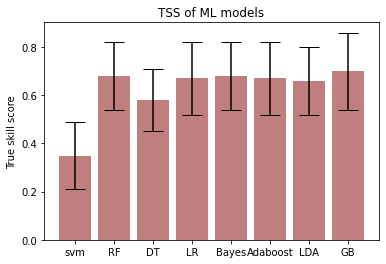

In [ ]:
# Build the plot
x_pos=np.arange(len(label))
fig, ax = plt.subplots()
ax.bar(x_pos, np.array(data), yerr=np.array(err), align='center', alpha=0.5, ecolor='black',color='maroon', capsize=10)
ax.set_ylabel('True skill score')
ax.set_xticks(x_pos)
ax.set_xticklabels(label)
ax.set_title('TSS of ML models')
#ax.yaxis.grid(True)


plt.show()

In [ ]:
for i in method:
  model_name(i,xdata,np.array(ydata))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


10.0 13.0 54.0 5.0


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


10.0 13.0 56.0 3.0


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


8.0 15.0 51.0 8.0


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


12.0 11.0 52.0 7.0


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


11.0 12.0 56.0 3.0


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


5.0 18.0 55.0 4.0


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


14.0 9.0 51.0 8.0


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


14.0 9.0 52.0 7.0


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


5.0 18.0 53.0 6.0


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


13.0 9.0 55.0 5.0
model_name= SVC(C=4.0, cache_size=500, class_weight={1: 6.5}, gamma=0.075, probability=True,
    tol=1e-08)
The TSS equals 0.35 +/- 0.14
accscore: 0.78 +/- 0.04
Precision: 0.81 +/- 0.04
REcall: 0.91 +/- 0.03
F1score: 0.85 +/- 0.02
ROC_AUC: 0.68 +/- 0.07
1-with CME,0-without CME


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ValueError: ignored

In [ ]:
xdata

,ERUPTION_corrected_C,ERUPTION_corrected_F,ERUPTION_corrected_N,ERUPTION_corrected_P,RATING,dur_min,TYPE_corrected_AR,TYPE_corrected_IP,TYPE_corrected_PC,TYPE_corrected_QS,THREADS_crctd_N,THREADS_crctd_Y
13,1,0,0,0,1,120,0,0,1,0,1,0
14,0,1,0,0,3.7,146,0,0,0,1,0,1
15,0,0,0,1,2,416,0,0,0,1,0,1
16,0,0,0,1,4,598,0,0,0,1,0,1
29,0,0,0,1,1.5,684,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
970,1,0,0,0,3,270,0,1,0,0,0,1
971,0,0,0,1,2,120,1,0,0,0,0,1
972,0,1,0,0,2,106,0,0,0,1,0,1
973,0,1,0,0,3,0,0,0,0,1,0,1


In [ ]:
ydata

,CME_crctd
13,0
14,1
15,1
16,1
29,1
...,...
970,0
971,1
972,0
973,1


In [ ]:
pred_trials=[]
pred_orig=[]
skf = StratifiedKFold(n_splits=10)
for j,i in (skf.split(xdata,ydata)):
  train = xdata.iloc[j]; test = xdata.iloc[i]     # test is examples in testing set; train is examples in training set
  ytrain = ydata.iloc[j]; ytest = ydata.iloc[i]
  svm.fit(train, ytrain)
  pred=svm.predict(test)
  pred_trials.append(pred)
  pred_orig.append(ytest)




/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

In [ ]:
np.array(pred_trials).T.shape
np.array(pred_orig).T.shape

(1, 82, 10)

In [ ]:
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(predicted_labels_list, y_test_list):
    cnf_matrix = confusion_matrix(y_test_list, predicted_labels_list)
    np.set_printoptions(precision=2)

    # Plot non-normalized confusion matrix
    plt.figure()
    generate_confusion_matrix(cnf_matrix, classes=class_names, title='Confusion matrix, without normalization')
    plt.show()

    # Plot normalized confusion matrix
    plt.figure()
    generate_confusion_matrix(cnf_matrix, classes=class_names, normalize=True, title='Normalized confusion matrix')
    plt.show()
def generate_confusion_matrix(cnf_matrix, classes, normalize=False, title='Confusion matrix'):
    if normalize:
        cnf_matrix = cnf_matrix.astype('float') / cnf_matrix.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cnf_matrix, interpolation='nearest', cmap=plt.get_cmap('Blues'))
    plt.title(title)
    plt.colorbar()

    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cnf_matrix.max() / 2.

    for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
        plt.text(j, i, format(cnf_matrix[i, j], fmt), horizontalalignment="center",
                 color="white" if cnf_matrix[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

    return cnf_matrix

import itertools
NO_CME=0
CME=1
class_names=[NO_CME,CME]

def confusion_table(pred, labels):
    """
    computes the number of TP, TN, FP, FN events given the arrays with predictions and true labels
    and returns the true skill score
  
    Args:
    pred: np array with predictions (1 for flare, 0 for nonflare)
    labels: np array with true labels (1 for flare, 0 for nonflare)
  
    Returns: true negative, false positive, true positive, false negative
    """  
    Nobs = len(pred)
    TN = 0.; TP = 0.; FP = 0.; FN = 0.
    for i in range(Nobs):
        if (pred[i] == 0 and labels[i] == 0):
            TN += 1
        elif (pred[i] == 1 and labels[i] == 0):
            FP += 1
        elif (pred[i] == 1 and labels[i] == 1):
            TP += 1 
        elif (pred[i] == 0 and labels[i] == 1):
            FN += 1
        else:
            print ("Error! Observation could not be classified.")
    return TN,FP,TP,FN

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

10.0 13.0 53.0 6.0
11.0 12.0 56.0 3.0
8.0 15.0 51.0 8.0
11.0 12.0 52.0 7.0


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


12.0 11.0 56.0 3.0
5.0 18.0 55.0 4.0
17.0 6.0 50.0 9.0


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


14.0 9.0 51.0 8.0
6.0 17.0 51.0 8.0
13.0 9.0 54.0 6.0
The TSS equals 0.36287130702753395 +/- 0.14830904184079474
SVMaccuracy 0.775609756097561 +/- 0.044708055560544774
SVMprecs 0.8151032540578917 +/- 0.044183638328953605
SVMrecs 0.895084745762712 +/- 0.03541075100850726
Confusion matrix, without normalization


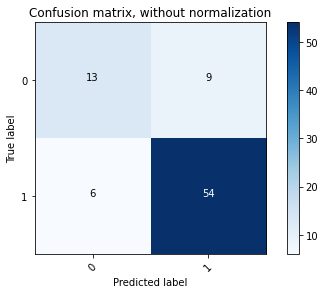

Normalized confusion matrix


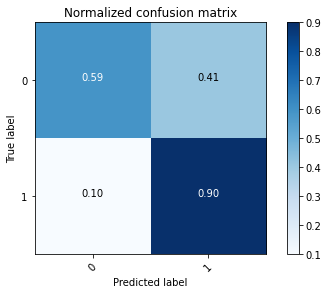

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
these_TSS_for_this_k = []
svmaccs=[]
recs=[]
precs=[]
recs=[]
pred_trials=[]
pred_orig=[]
skf = StratifiedKFold(n_splits=10)
for j,i in (skf.split(xdata,ydata)):
  train = xdata.iloc[j]; test = xdata.iloc[i]     # test is examples in testing set; train is examples in training set
  ytrain = ydata.iloc[j]; ytest = ydata.iloc[i]
  svm.fit(train, ytrain)
  pred=svm.predict(test)
  pred_trials.append(pred)
  pred_orig.append(ytest)
  TN,FP,TP,FN = confusion_table(pred, np.array(ytest))
  if (((TP+FN) == 0.0) or (FP+TN)==0.0):
     these_TSS_for_this_k.append(-1.0)
     continue
  else:
     these_TSS_for_this_k.append(TP/(TP+FN) - FP/(FP+TN))
  print(TN,FP,TP,FN)
  svmacc = accuracy_score(ytest, pred)
  prec = precision_score(ytest, pred)
  rec = recall_score(ytest, pred)
  svmaccs.append(svmacc)
  precs.append(prec)
  recs.append(rec)
TSS_k = np.array(these_TSS_for_this_k)
array_of_avg_TSS=np.mean(TSS_k)
array_of_std_TSS=np.std(TSS_k)
print("The TSS equals",array_of_avg_TSS,'+/-',array_of_std_TSS)
svmaccuracy = np.mean(svmaccs)
print("SVMaccuracy",np.mean(svmaccs),'+/-',np.std(svmaccs))
print("SVMprecs",np.mean(precs),'+/-',np.std(precs))
print("SVMrecs",np.mean(recs),'+/-',np.std(recs))
plot_confusion_matrix(pred, ytest)
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


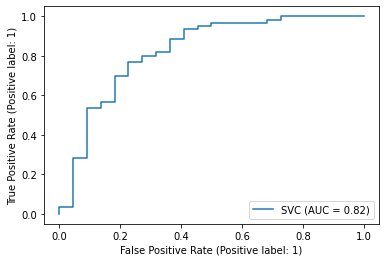

In [ ]:
from sklearn import metrics
metrics.plot_roc_curve(svm, test, ytest)
plt.show()

In [ ]:
xdata.columns

Index(['ERUPTION_corrected_C', 'ERUPTION_corrected_F', 'ERUPTION_corrected_N',
       'ERUPTION_corrected_P', 'RATING', 'dur_min', 'TYPE_corrected_AR',
       'TYPE_corrected_IP', 'TYPE_corrected_PC', 'TYPE_corrected_QS',
       'THREADS_crctd_N', 'THREADS_crctd_Y'],
      dtype='object')

In [ ]:
#Function for several models

from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

def model_training(xdata,ydata_shuffled,model):
  these_TSS_for_this_k = []
  lraccs=[]
  recs=[]
  precs=[]
  recs=[]
  skf = StratifiedKFold(n_splits=10)
  for k,(j,i) in enumerate(skf.split(xdata,ydata_shuffled)):
      train = xdata[j]; test = xdata[i]     # test is examples in testing set; train is examples in training set
      ytrain = ydata_shuffled[j]; ytest = ydata_shuffled[i]   # ytest is labels in testing set; ytrain is labels in training set
      model.fit(train, ytrain)
      pred = model.predict(test)
      TN,FP,TP,FN = confusion_table(pred, ytest)
      if (((TP+FN) == 0.0) or (FP+TN)==0.0):
          these_TSS_for_this_k.append(-1.0)
          continue
      else:
          these_TSS_for_this_k.append(TP/(TP+FN) - FP/(FP+TN))
      print(TN,FP,TP,FN)
      lracc = accuracy_score(ytest, pred)
      prec = precision_score(ytest, pred)
      rec = recall_score(ytest, pred)
      lraccs.append(lracc)
      precs.append(prec)
      recs.append(rec)
  TSS_k = np.array(these_TSS_for_this_k)
  array_of_avg_TSS=np.mean(TSS_k)
  array_of_std_TSS=np.std(TSS_k)
  print("The TSS equals",array_of_avg_TSS,'+/-',array_of_std_TSS)
  lraccuracy = np.mean(lraccs)
  print(np.mean(lraccs),'+/-',np.std(lraccs))
  print(np.mean(precs),'+/-',np.std(precs))
  print(np.mean(recs),'+/-',np.std(recs))
  plot_confusion_matrix(pred, ytest)
  metrics.plot_roc_curve(model, test, ytest)
  plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (m

20.0 3.0 58.0 1.0
11.0 12.0 59.0 0.0
9.0 14.0 58.0 1.0
16.0 7.0 57.0 2.0
16.0 7.0 58.0 1.0
13.0 10.0 58.0 1.0


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example

18.0 5.0 57.0 2.0
19.0 4.0 58.0 1.0
18.0 5.0 58.0 1.0
17.0 5.0 60.0 0.0
The TSS equals 0.6690192269042675 +/- 0.1475565689699043
0.9 +/- 0.041103169625250534
0.8921785565347203 +/- 0.04539519858610901
0.9830508474576272 +/- 0.010719585288706377
Confusion matrix, without normalization


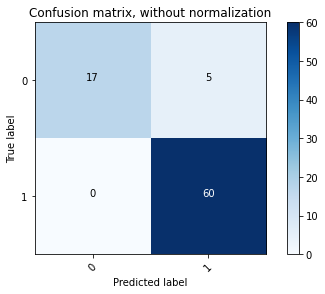

Normalized confusion matrix


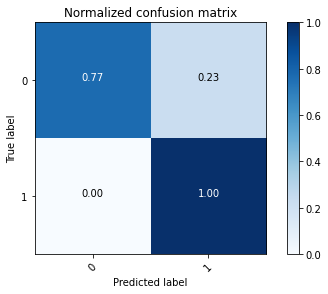

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


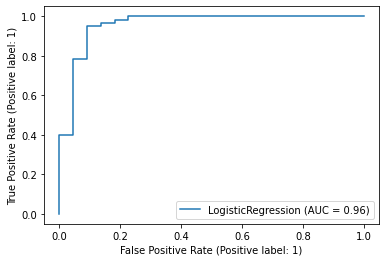

In [ ]:
log_reg = LogisticRegression()
model_training(np.array(xdata),np.array(ydata),log_reg)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

21.0 2.0 53.0 6.0
14.0 9.0 54.0 5.0
10.0 13.0 56.0 3.0
18.0 5.0 54.0 5.0
17.0 6.0 52.0 7.0
17.0 6.0 53.0 6.0
19.0 4.0 53.0 6.0
20.0 3.0 50.0 9.0
22.0 1.0 54.0 5.0
17.0 5.0 60.0 0.0
The TSS equals 0.6760936557915188 +/- 0.13546080244583197
0.8707317073170732 +/- 0.04052011640447841
0.9120600362563309 +/- 0.04742827529115445
0.9118644067796611 +/- 0.03850107353084932
Confusion matrix, without normalization


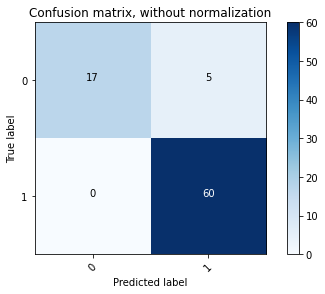

Normalized confusion matrix


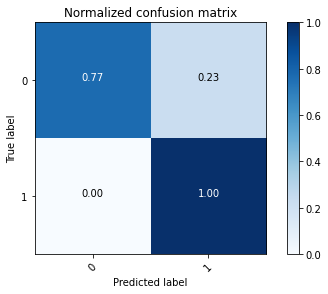

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


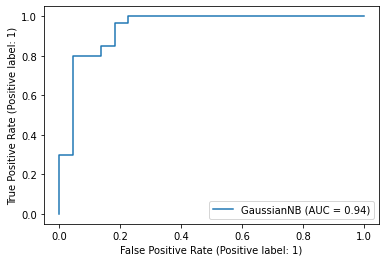

In [ ]:
#NAIVEbayes
from sklearn.naive_bayes import GaussianNB
naive_bayes = GaussianNB()
model_training(np.array(xdata),np.array(ydata),naive_bayes)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


19.0 4.0 57.0 2.0


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


11.0 12.0 59.0 0.0


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


9.0 14.0 57.0 2.0


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


17.0 6.0 55.0 4.0


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


17.0 6.0 58.0 1.0


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


15.0 8.0 58.0 1.0


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


18.0 5.0 56.0 3.0


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


19.0 4.0 58.0 1.0


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


19.0 4.0 58.0 1.0


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


19.0 3.0 59.0 1.0
The TSS equals 0.6853601974051495 +/- 0.14994497320621603
0.9 +/- 0.04287413617377302
0.8995519701506316 +/- 0.04624893933786552
0.972909604519774 +/- 0.01888918226260318
Confusion matrix, without normalization


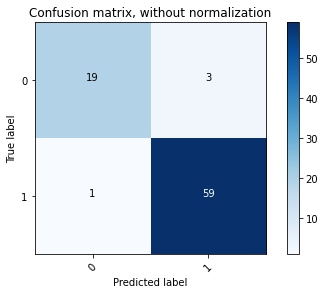

Normalized confusion matrix


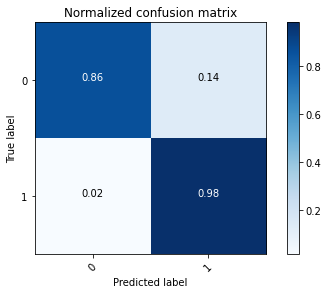

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


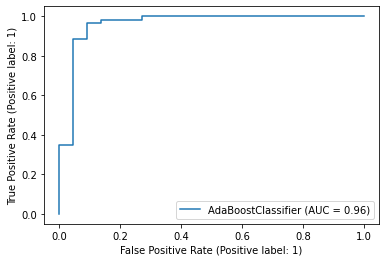

In [ ]:
#adaboost
from sklearn.ensemble import AdaBoostClassifier
adaboost = AdaBoostClassifier(n_estimators=1000, random_state=0, algorithm='SAMME')
model_training(np.array(xdata),np.array(ydata),adaboost)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:1286: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'squared_error' instead, as trees should use a squared error criterion in Gradient Boosting.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:370: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:370: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_e

20.0 3.0 58.0 1.0


/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:370: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:370: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:370: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:370: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:370: FutureWarni

12.0 11.0 59.0 0.0


/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:370: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:370: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:370: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:370: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:370: FutureWarni

9.0 14.0 58.0 1.0


/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:370: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:370: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:370: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:370: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:370: FutureWarni

16.0 7.0 57.0 2.0


/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:370: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:370: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:370: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:370: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:370: FutureWarni

15.0 8.0 58.0 1.0


/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:370: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:370: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:370: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:370: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:370: FutureWarni

13.0 10.0 58.0 1.0


/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:370: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:370: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:370: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:370: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:370: FutureWarni

18.0 5.0 57.0 2.0


/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:370: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:370: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:370: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:370: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:370: FutureWarni

19.0 4.0 58.0 1.0


/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:370: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:370: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:370: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:370: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:370: FutureWarni

18.0 5.0 58.0 1.0


/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:370: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:370: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:370: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:370: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:370: FutureWarni

17.0 5.0 60.0 0.0
The TSS equals 0.6690192269042674 +/- 0.14285670319144153
0.9 +/- 0.04000297430940665
0.8920136979191577 +/- 0.04412972339257533
0.9830508474576272 +/- 0.010719585288706377
Confusion matrix, without normalization


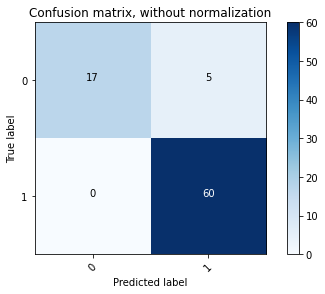

Normalized confusion matrix


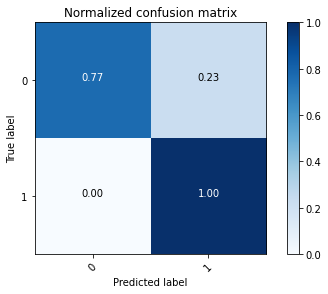

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


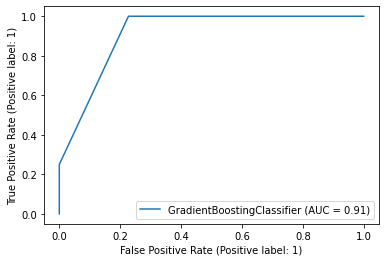

In [ ]:
#Gradientboost

from sklearn.ensemble import GradientBoostingClassifier
grboost = GradientBoostingClassifier(loss='exponential',criterion='mae',n_estimators=100)
model_training(np.array(xdata),np.array(ydata),grboost)

19.0 4.0 59.0 0.0
11.0 12.0 59.0 0.0
9.0 14.0 58.0 1.0
16.0 7.0 57.0 2.0
15.0 8.0 58.0 1.0
13.0 10.0 58.0 1.0
18.0 5.0 57.0 2.0
19.0 4.0 58.0 1.0
18.0 5.0 58.0 1.0
17.0 5.0 60.0 0.0
The TSS equals 0.6620184899845917 +/- 0.14465478566422577
0.8987804878048781 +/- 0.041193526229401305
0.889395401620418 +/- 0.04385816696903876
0.9847457627118643 +/- 0.011864406779661019
Confusion matrix, without normalization


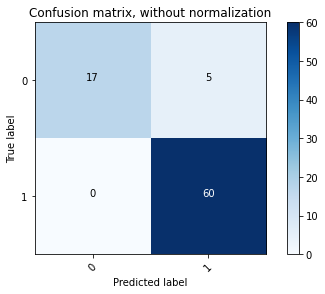

Normalized confusion matrix


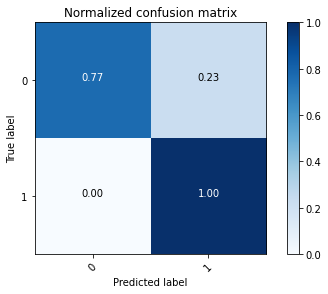

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


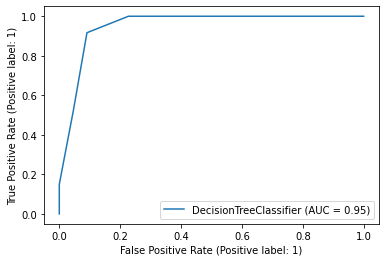

In [ ]:
#Decisiontree
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(criterion='entropy', splitter='best',max_depth=3)
model_training(np.array(xdata),np.array(ydata),dtree)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


21.0 2.0 54.0 5.0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


13.0 10.0 56.0 3.0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


9.0 14.0 58.0 1.0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


17.0 6.0 54.0 5.0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


16.0 7.0 54.0 5.0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


14.0 9.0 56.0 3.0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


17.0 6.0 55.0 4.0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


19.0 4.0 53.0 6.0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


19.0 4.0 55.0 4.0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


19.0 3.0 56.0 4.0
The TSS equals 0.6491148031531229 +/- 0.1324815085183073
0.871951219512195 +/- 0.030487804878048808
0.8977930319373117 +/- 0.046582943137006574
0.932316384180791 +/- 0.02274220083758578
Confusion matrix, without normalization


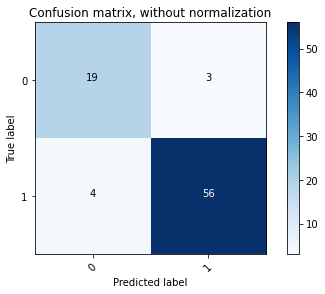

Normalized confusion matrix


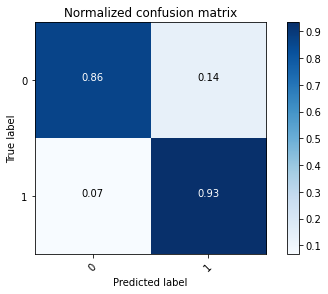

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


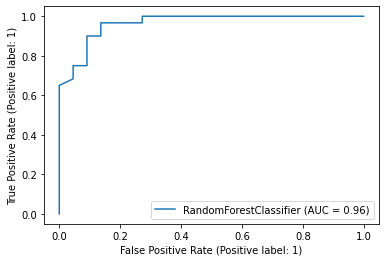

In [ ]:
#Randomforest
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=100,class_weight='balanced_subsample')
model_training(np.array(xdata),np.array(ydata),forest)

In [ ]:
#balancedbagging
from imblearn.ensemble import BalancedBaggingClassifier
bbc = BalancedBaggingClassifier(base_estimator=DecisionTreeClassifier(),sampling_strategy='auto',replacement=False,random_state=0)
model_training(np.array(xdata),np.array(ydata),bbc)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_bagging.py:719: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AttributeError: ignored

In [ ]:
from imblearn.ensemble import EasyEnsembleClassifier
EE = EasyEnsembleClassifier(n_estimators=50)
model_training(np.array(xdata),np.array(ydata),EE)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_bagging.py:719: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AttributeError: ignored

In [ ]:
method_names=['SVM','Logistic','NaiveBayes','Adaboost','GRBOOST','DecisionTree','Randomforest']
method_scores=[0.77,0.9,0.87,0.9,0.9,0.89,0.87]

Text(0, 0.5, 'Method Score')

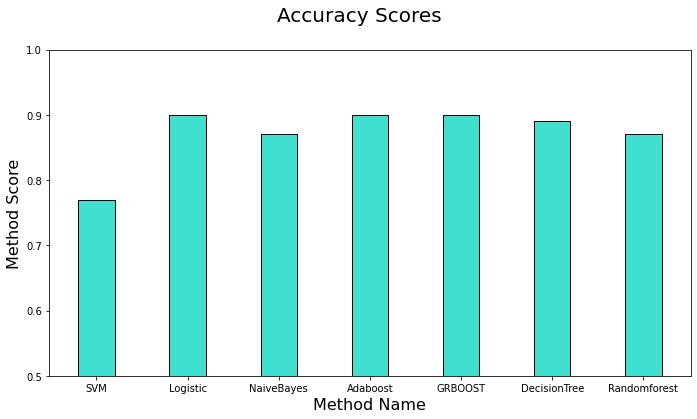

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(11.5,6))
plt.ylim([0.50,1])
plt.bar(method_names,method_scores,width=0.4,color='turquoise',edgecolor='black')
fig.suptitle('Accuracy Scores', fontsize=20)
plt.xlabel('Method Name',fontsize=16)
plt.ylabel('Method Score',fontsize=16)



Text(0.5, 0, 'Method Score')

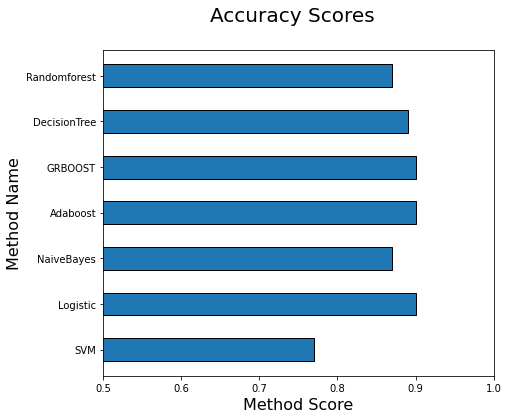

In [ ]:
fig = plt.figure(figsize=(7,6))
plt.xlim([0.50,1])
plt.barh(method_names,method_scores,height = 0.5,edgecolor='black')
fig.suptitle('Accuracy Scores', fontsize=20)
plt.ylabel('Method Name',fontsize=16)
plt.xlabel('Method Score',fontsize=16)